In [ ]:
Clustering: Hierarchical 
Dataset : 50_Startups.csv
Apply Data pre-processing (Label Encoding , Data Transformation….) 
techniques if necessary.
Apply Hierarchical clustering algorithms (based on PROFIT column)
to find the group of start-ups.


In [17]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
data = pd.read_csv('50_Startups.csv')

In [3]:
data.isnull().sum()

RND       0
ADMIN     0
MKT       0
STATE     0
PROFIT    0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RND     50 non-null     float64
 1   ADMIN   50 non-null     float64
 2   MKT     50 non-null     float64
 3   STATE   50 non-null     object 
 4   PROFIT  50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
numeric_data = data.drop(['STATE'],axis = 1)

In [7]:
label_encoder = LabelEncoder()
data['STATE'] = label_encoder.fit_transform(data['STATE'])

In [8]:
data_encoded = data.copy()

In [10]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

In [11]:
X = data_encoded[['PROFIT']]

In [12]:
cluster = AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')

In [13]:
data['cluster'] = cluster.fit_predict(X)

C:\Users\ADMIN\Desktop\sample_project_1\env\Lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [19]:
linked = linkage(X,'ward')

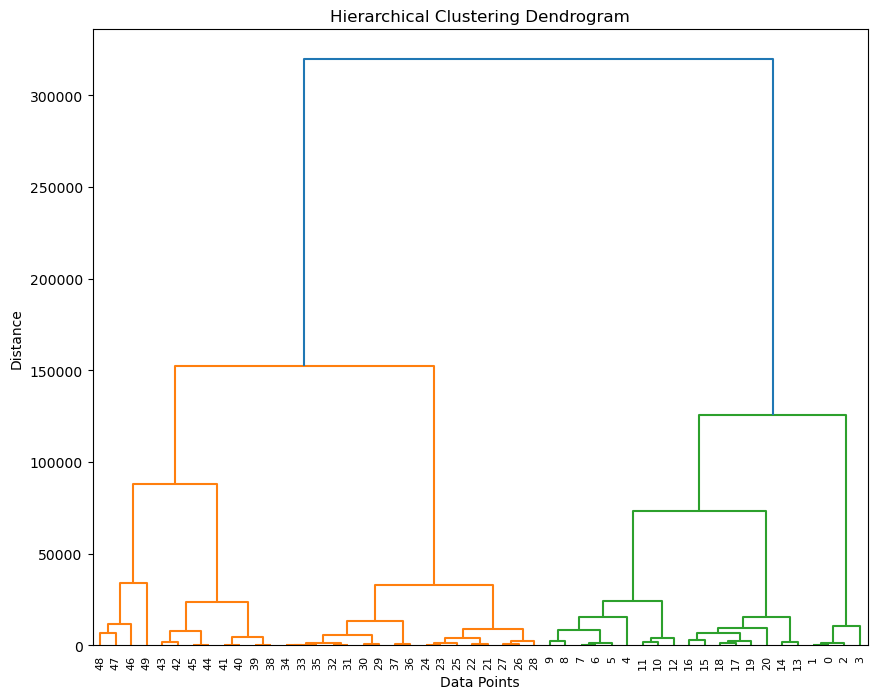

In [22]:
plt.figure(figsize=(10,8))
dendrogram(linked,orientation='top',distance_sort='descending',show_leaf_counts='true')
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

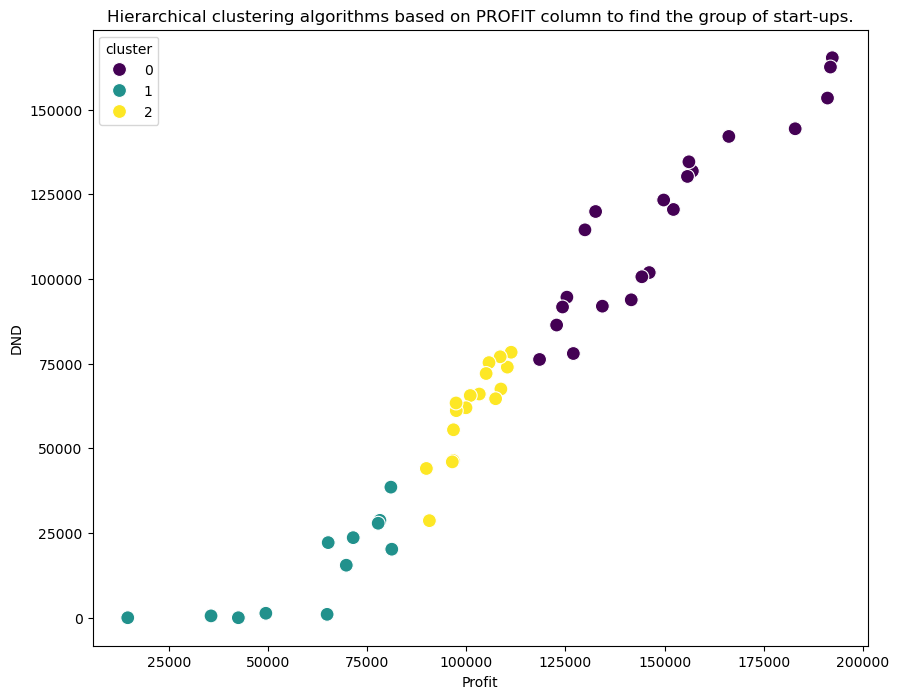

In [15]:
plt.figure(figsize=(10,8))
sns.scatterplot(x = 'PROFIT' , y = 'RND' , hue = 'cluster',data = data, palette='viridis',s = 100)
plt.title('Hierarchical clustering algorithms based on PROFIT column to find the group of start-ups.')
plt.xlabel('Profit')
plt.ylabel('DND')
plt.show()